Vector de Bloch Inicial: [np.float64(0.7692450521366152), np.float64(0.5262688548013826), np.float64(0.36235775447667357)]


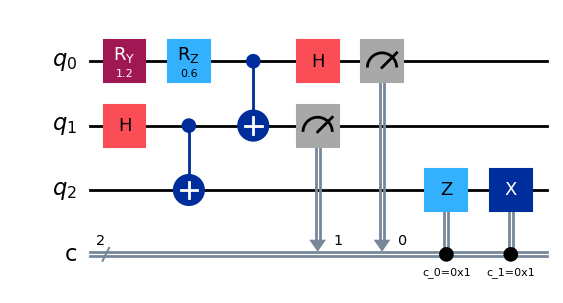

Resultados de la medición: {'01': 242, '11': 263, '00': 251, '10': 244}
Resultado más común: 11
Vector de Bloch Final (antes de rotaciones): [np.float64(0.0), np.float64(0.0), np.float64(-1.0)]
Vector de Bloch Final (después de rotaciones): [np.float64(-0.7692450521366152), np.float64(-0.5262688548013826), np.float64(-0.36235775447667357)]


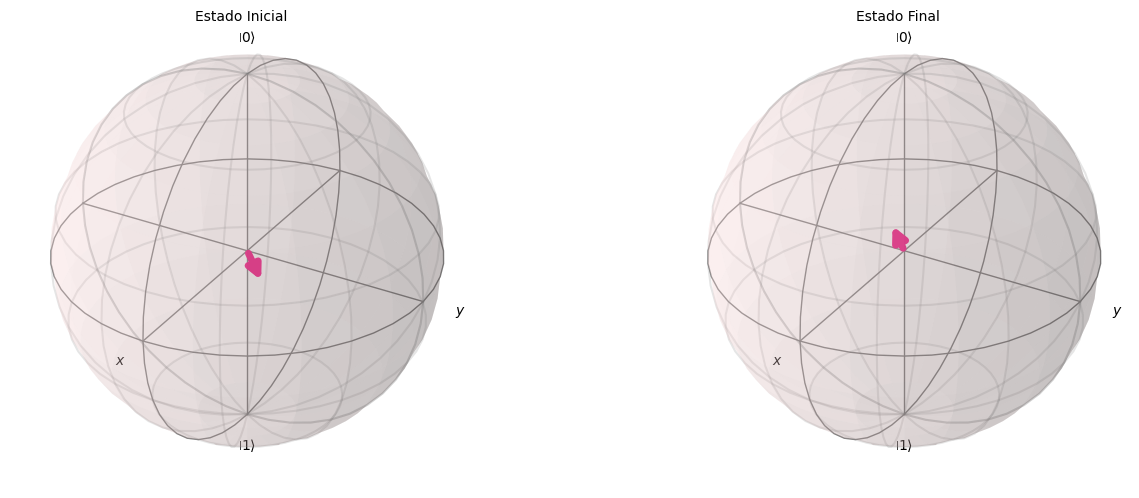

In [29]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

def get_bloch_vector(circuit):
    state = Statevector.from_instruction(circuit)
    x = 2 * np.real(np.conj(state.data[0]) * state.data[1])
    y = 2 * np.imag(np.conj(state.data[0]) * state.data[1])
    z = np.real(np.conj(state.data[0]) * state.data[0] - np.conj(state.data[1]) * state.data[1])
    return [x, y, z]

# Crear el estado inicial
initial_circuit = QuantumCircuit(1)
initial_circuit.ry(1.2, 0)
initial_circuit.rz(0.6, 0)

initial_bloch = get_bloch_vector(initial_circuit)
print("Vector de Bloch Inicial:", initial_bloch)

# Crear el circuito de teleportación
qc = QuantumCircuit(3, 2)

# Preparar el estado a teleportar
qc.ry(1.2, 0)
qc.rz(0.6, 0)

# Crear entrelazamiento
qc.h(1)
qc.cx(1, 2)

# Operaciones de teleportación
qc.cx(0, 1)
qc.h(0)

# Medir los qubits de Alice
qc.measure([0, 1], [0, 1])

# Operaciones condicionales en el qubit de Bob
qc.z(2).c_if(0, 1)
qc.x(2).c_if(1, 1)

display(qc.draw(output='mpl'))

# Configurar el simulador
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)

# Ejecutar el circuito
job = simulator.run(transpiled_qc, shots=1000)
result = job.result()
counts = result.get_counts()
print("Resultados de la medición:", counts)

# Reconstruir el estado final
most_common_result = max(counts, key=counts.get)
print("Resultado más común:", most_common_result)

final_circuit = QuantumCircuit(1)
if most_common_result[0] == '1':
    final_circuit.z(0)
if most_common_result[1] == '1':
    final_circuit.x(0)

final_bloch = get_bloch_vector(final_circuit)
print("Vector de Bloch Final (antes de rotaciones):", final_bloch)

# Aplicar rotaciones al estado final
final_circuit.ry(1.2, 0)
final_circuit.rz(0.6, 0)

final_bloch_rotated = get_bloch_vector(final_circuit)
print("Vector de Bloch Final (después de rotaciones):", final_bloch_rotated)

# Visualizar los estados en la esfera de Bloch
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

plot_bloch_vector(initial_bloch, title="Estado Inicial", ax=ax1)
plot_bloch_vector(final_bloch_rotated, title="Estado Final", ax=ax2)

plt.subplots_adjust(wspace=0.3)
plt.show()